<a href="https://colab.research.google.com/github/XplorodoX/EDS_projekt/blob/master/BMI_Uebergewicht.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Einführung in Data Science**

**Fakultät Informatik &ndash; Hochschule Aalen**

**Autoren:** Florian Merlau, Vithusan Ratneswaran, Gianni Balbo

# **Explorative Datenanalyse:**

## **Erste Schritte**

### *Entscheidung welche features wir benötigen*

Wir haben uns für die features ERBMI, ERTPREAT, TEAGE,TESEX, EUDRINK, EUEXERCISE,EUEXFREQ,EUFASTFDFRQ,EUFDSIT,EUGENHTH entschieden, weil wir die Essstörungen im Bezug zum BMI analysieren wollen.

## ***Vorbereitung fürs Coden***



### *Benötigte Bilbliotheken importieren*

Nachinstallieren der Bibliothek:  **iteration-utilities** mit pip

In [1643]:
!pip install iteration-utilities

In [1644]:
import pandas as pd
import numpy as np
from iteration_utilities import duplicates
from iteration_utilities import unique_everseen
import plotly.express as px
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from google.colab import files
from zipfile import ZipFile
import requests

### Collect/Upload Datenbanken (nur wenn die Laufzeit neu initalisiert wird!)

In [1645]:
def get_Databank():
  uploaded = files.upload()

#get_Databank()

### *Datenbanken importieren*







In [1646]:
atusrost_link = 'https://www.bls.gov/tus/special.requests/atusrost_2016.zip'
atussum_link = 'https://www.bls.gov/tus/special.requests/atussum_2016.zip'

In [1647]:
raw_ehresp = pd.read_csv('ehresp_2016s.dat')
raw_atusrost = pd.read_csv('atusrost_2016.dat')
raw_atussum = pd.read_csv('atussum_2016.dat')

## **Analyse der Datenbanken**

### *Auslesen der Tabellen mit Head() zum Inspizieren*

In [1648]:
raw_ehresp.head()

,TUCASEID,TULINENO,EEINCOME1,ERBMI,ERHHCH,ERINCOME,ERSPEMCH,ERTPREAT,ERTSEAT,ETHGT,ETWGT,EUDIETSODA,EUDRINK,EUEAT,EUEXERCISE,EUEXFREQ,EUFASTFD,EUFASTFDFRQ,EUFFYDAY,EUFDSIT,EUFINLWGT,EUSNAP,EUGENHTH,EUGROSHP,EUHGT,EUINCLVL,EUINCOME2,EUMEAT,EUMILK,EUPRPMEL,EUSODA,EUSTORES,EUSTREASON,EUTHERM,EUWGT,EUWIC,EXINCOME1
0,20160101160045,1,2,26.6,3,3,5,40,0,0,0,-1,1,2,2,-1,2,-1,-1,1,2.529098e+07,2,3,1,66,7,1,1,2,1,2,2,4,2,165,-1,0
1,20160101160066,1,2,44.3,3,3,5,30,15,0,0,-1,2,1,1,2,2,-1,-1,1,6.301579e+06,2,4,1,69,7,1,1,2,1,-1,1,2,2,300,-1,0
2,20160101160069,1,2,24.5,3,5,-1,75,0,0,0,-1,2,2,1,1,2,-1,-1,1,9.545378e+06,1,2,1,64,7,2,1,2,1,-1,1,5,1,143,2,0
3,20160101160083,1,2,21.2,1,5,-1,165,0,0,2,-1,1,2,1,3,2,-1,-1,1,3.034797e+06,1,3,1,57,7,2,1,2,1,2,1,1,2,98,2,0
4,20160101160084,1,1,29.7,3,1,3,30,27,0,0,-1,1,1,2,-1,2,-1,-1,1,7.238641e+06,2,2,1,64,7,-1,2,2,3,2,1,1,-1,173,-1,0


In [1649]:
raw_atussum.head()

,TUCASEID,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,TEMJOT,TRDPFTPT,TESCHENR,TESCHLVL,TRSPPRES,TESPEMPNOT,TRERNWA,TRCHILDNUM,TRSPFTPT,TEHRUSLT,TUDIARYDAY,TRHOLIDAY,TRTEC,TRTHH,t010101,t010102,t010201,t010299,t010301,t010399,t010401,t010499,t020101,t020102,t020103,t020104,t020199,t020201,t020202,t020203,...,t180704,t180799,t180801,t180802,t180803,t180804,t180805,t180806,t180807,t180899,t180901,t180902,t180903,t180904,t180905,t180999,t181001,t181002,t181099,t181101,t181201,t181202,t181203,t181204,t181205,t181301,t181302,t181399,t181401,t181499,t181501,t181599,t181601,t181801,t189999,t500101,t500103,t500105,t500106,t500107
0,20160101160045,2.458865e+07,-1,62,2,39,1,2,1,5,-1,-1,-1,-1,1,2,-1,0,-1,-1,6,0,-1,0,690,0,25,0,0,0,0,0,75,6,0,0,0,50,0,45,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20160101160066,5.445941e+06,-1,69,1,37,2,2,2,5,-1,-1,-1,-1,1,2,-1,0,-1,-1,1,0,30,0,600,0,20,0,0,0,0,0,60,0,0,0,0,150,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,20160101160069,8.782622e+06,0,24,2,39,2,2,1,5,-1,-1,2,-1,3,-1,-1,2,-1,-1,1,0,-1,380,940,0,120,0,0,0,0,0,0,0,0,30,0,75,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,0,0,0,0
3,20160101160083,3.035910e+06,8,31,2,40,1,2,2,1,2,2,2,-1,3,-1,46944,3,-1,32,1,0,-1,705,635,0,20,0,0,0,0,0,20,50,65,60,0,90,0,50,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20160101160084,6.978586e+06,-1,59,2,39,1,2,1,1,1,2,-1,-1,1,2,30250,0,-1,12,1,0,-1,0,500,0,80,0,0,0,0,0,30,25,0,0,0,0,0,0,...,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0


In [1650]:
raw_atusrost.head()

,TUCASEID,TULINENO,TEAGE,TERRP,TESEX,TXAGE,TXRRP,TXSEX
0,20160101160045,1,62,18,2,0,0,0
1,20160101160045,2,65,20,1,0,0,0
2,20160101160045,3,43,22,1,0,0,0
3,20160101160066,1,69,18,1,0,0,0
4,20160101160066,2,67,20,2,0,0,0


Check wie viele leere Einträge wir für ERBMI haben

In [1651]:
merged_inner['ERBMI'].isna().sum()

795

### *Checken was für Datentypen wir in den Tabellen haben bzw. Gültig sind*

In [1652]:
list(raw_atusrost.dtypes)

[dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64')]

In [1653]:
list(raw_ehresp.dtypes)

[dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64')]

In [1654]:
list(raw_atussum.dtypes)

[dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int6

### *Wie viele insgesamte Einträge wir in allen 3 Datenbanken?*

In [1655]:
x=len(raw_atusrost)
y=len(raw_atussum)
z=len(raw_ehresp)
[x,y,z]

[27884, 10493, 10210]

### *Wie viele leere Einträge haben wir in allen 3 Datenbanken*

Für die Datenbank *Atussum*:

In [1656]:
df_isna_atussum = raw_atussum.isna().sum()
df_isna_atussum = df_isna_atussum.value_counts().sum()
df_isna_atussum

423

Für die Datenbank *Ehresp*:

In [1657]:
df_isna_ehresp= raw_ehresp.isna().sum()
df_isna_ehresp= df_isna_ehresp.value_counts().sum()
df_isna_ehresp

37

Für die Datenbank *Aturost*:

In [1658]:
df_isna_aturost = raw_atusrost.isna().sum()
df_isna_aturost= df_isna_aturost.value_counts().sum()
df_isna_aturost

8

### Nach Duplikate in TUCASEID schauen

In [1659]:
list(unique_everseen(duplicates(raw_atussum['TUCASEID'])))

[]

In [1660]:
list(unique_everseen(duplicates(raw_ehresp['TUCASEID'])))

[]

In [1661]:
list(unique_everseen(duplicates(raw_atusrost['TUCASEID'])))

[20160101160045,
 20160101160066,
 20160101160069,
 20160101160083,
 20160101160084,
 20160101160094,
 20160101160116,
 20160101160135,
 20160101160139,
 20160101160533,
 20160101160546,
 20160101160550,
 20160101160564,
 20160101160569,
 20160101160571,
 20160101160573,
 20160101160574,
 20160101160578,
 20160101160591,
 20160101160602,
 20160101160658,
 20160101160660,
 20160101160663,
 20160101160674,
 20160101160694,
 20160101160734,
 20160101160758,
 20160101160769,
 20160101160813,
 20160101160820,
 20160101160828,
 20160101160835,
 20160101160837,
 20160101160846,
 20160101160862,
 20160101160869,
 20160101160884,
 20160101160894,
 20160101160914,
 20160101160916,
 20160101160917,
 20160101160995,
 20160101161013,
 20160101161019,
 20160101161070,
 20160101161076,
 20160101161080,
 20160101161086,
 20160101161107,
 20160101161115,
 20160101161141,
 20160101161156,
 20160101161189,
 20160101161237,
 20160101161238,
 20160101161245,
 20160101161249,
 20160101161290,
 2016010116131

### Analyse über Min/Max

In [1662]:
def minMax(df,c):
  z= []
  z.append(df[c].max())
  z.append(df[c].min())
  return z

In [1663]:
list_columns = ['ERTPREAT', 'TEAGE','TESEX', 'ERBMI', 'EUDRINK', 'EUEXERCISE','EUEXFREQ','EUFASTFDFRQ','EUFDSIT','EUGENHTH'  ]

In [1664]:
for i in list_columns :
  print(minMax(merged_inner,i))

[570.0, 0.0]
[85, 15]
[2, 1]
[61.8, 11.6]
[2.0, 1.0]
[2.0, 1.0]
[97.0, 1.0]
[31.0, 1.0]
[3.0, 1.0]
[5.0, 1.0]


### *Zusammenführen von den Datenbanken: Atussum & Ehresp in ein neues Dataframe merged_inner*

In [1665]:
merged_inner = pd.merge(raw_atussum,raw_ehresp, on = 'TUCASEID', how ='outer')
merged_inner.head(30)

,TUCASEID,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,TEMJOT,TRDPFTPT,TESCHENR,TESCHLVL,TRSPPRES,TESPEMPNOT,TRERNWA,TRCHILDNUM,TRSPFTPT,TEHRUSLT,TUDIARYDAY,TRHOLIDAY,TRTEC,TRTHH,t010101,t010102,t010201,t010299,t010301,t010399,t010401,t010499,t020101,t020102,t020103,t020104,t020199,t020201,t020202,t020203,...,t500103,t500105,t500106,t500107,TULINENO,EEINCOME1,ERBMI,ERHHCH,ERINCOME,ERSPEMCH,ERTPREAT,ERTSEAT,ETHGT,ETWGT,EUDIETSODA,EUDRINK,EUEAT,EUEXERCISE,EUEXFREQ,EUFASTFD,EUFASTFDFRQ,EUFFYDAY,EUFDSIT,EUFINLWGT,EUSNAP,EUGENHTH,EUGROSHP,EUHGT,EUINCLVL,EUINCOME2,EUMEAT,EUMILK,EUPRPMEL,EUSODA,EUSTORES,EUSTREASON,EUTHERM,EUWGT,EUWIC,EXINCOME1
0,20160101160045,2.458865e+07,-1,62,2,39,1,2,1,5,-1,-1,-1,-1,1,2,-1,0,-1,-1,6,0,-1,0,690,0,25,0,0,0,0,0,75,6,0,0,0,50,0,45,...,0,0,0,0,1.0,2.0,26.6,3.0,3.0,5.0,40.0,0.0,0.0,0.0,-1.0,1.0,2.0,2.0,-1.0,2.0,-1.0,-1.0,1.0,2.529098e+07,2.0,3.0,1.0,66.0,7.0,1.0,1.0,2.0,1.0,2.0,2.0,4.0,2.0,165.0,-1.0,0.0
1,20160101160066,5.445941e+06,-1,69,1,37,2,2,2,5,-1,-1,-1,-1,1,2,-1,0,-1,-1,1,0,30,0,600,0,20,0,0,0,0,0,60,0,0,0,0,150,0,0,...,0,0,0,0,1.0,2.0,44.3,3.0,3.0,5.0,30.0,15.0,0.0,0.0,-1.0,2.0,1.0,1.0,2.0,2.0,-1.0,-1.0,1.0,6.301579e+06,2.0,4.0,1.0,69.0,7.0,1.0,1.0,2.0,1.0,-1.0,1.0,2.0,2.0,300.0,-1.0,0.0
2,20160101160069,8.782622e+06,0,24,2,39,2,2,1,5,-1,-1,2,-1,3,-1,-1,2,-1,-1,1,0,-1,380,940,0,120,0,0,0,0,0,0,0,0,30,0,75,0,0,...,0,0,0,0,1.0,2.0,24.5,3.0,5.0,-1.0,75.0,0.0,0.0,0.0,-1.0,2.0,2.0,1.0,1.0,2.0,-1.0,-1.0,1.0,9.545378e+06,1.0,2.0,1.0,64.0,7.0,2.0,1.0,2.0,1.0,-1.0,1.0,5.0,1.0,143.0,2.0,0.0
3,20160101160083,3.035910e+06,8,31,2,40,1,2,2,1,2,2,2,-1,3,-1,46944,3,-1,32,1,0,-1,705,635,0,20,0,0,0,0,0,20,50,65,60,0,90,0,50,...,0,0,0,0,1.0,2.0,21.2,1.0,5.0,-1.0,165.0,0.0,0.0,2.0,-1.0,1.0,2.0,1.0,3.0,2.0,-1.0,-1.0,1.0,3.034797e+06,1.0,3.0,1.0,57.0,7.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,98.0,2.0,0.0
4,20160101160084,6.978586e+06,-1,59,2,39,1,2,1,1,1,2,-1,-1,1,2,30250,0,-1,12,1,0,-1,0,500,0,80,0,0,0,0,0,30,25,0,0,0,0,0,0,...,0,0,0,0,1.0,1.0,29.7,3.0,1.0,3.0,30.0,27.0,0.0,0.0,-1.0,1.0,1.0,2.0,-1.0,2.0,-1.0,-1.0,1.0,7.238641e+06,2.0,2.0,1.0,64.0,7.0,-1.0,2.0,2.0,3.0,2.0,1.0,1.0,-1.0,173.0,-1.0,0.0
5,20160101160094,5.191610e+06,4,16,2,36,3,1,1,5,-1,-1,1,1,3,-1,-1,4,-1,-1,1,0,-1,0,565,0,55,0,0,0,0,0,0,0,0,0,0,90,10,0,...,0,0,0,0,1.0,2.0,30.9,3.0,5.0,-1.0,120.0,9.0,0.0,0.0,2.0,1.0,1.0,1.0,6.0,1.0,1.0,2.0,1.0,5.298292e+06,1.0,2.0,2.0,60.0,7.0,2.0,-1.0,-1.0,2.0,1.0,-1.0,-1.0,-1.0,158.0,1.0,0.0
6,20160101160116,9.391848e+06,5,43,2,43,1,2,1,5,-1,-1,2,-1,1,1,-1,3,1,-1,3,0,-1,120,435,0,10,0,0,0,0,0,0,0,0,0,0,80,0,0,...,0,0,0,0,1.0,1.0,18.3,3.0,1.0,5.0,45.0,0.0,0.0,0.0,-1.0,2.0,2.0,1.0,3.0,2.0,-1.0,-1.0,1.0,9.648727e+06,2.0,1.0,1.0,65.0,7.0,-1.0,1.0,2.0,1.0,-1.0,1.0,2.0,2.0,110.0,2.0,0.0
7,20160101160135,2.023918e+06,0,34,2,39,1,2,1,5,-1,-1,2,-1,3,-1,-1,3,-1,-1,1,0,-1,615,645,0,20,0,0,0,0,0,180,90,0,0,0,5,0,30,...,0,0,0,0,1.0,2.0,40.8,3.0,5.0,-1.0,40.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,7.0,1.0,1.0,2.0,1.0,2.018001e+06,1.0,3.0,1.0,65.0,7.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,245.0,1.0,0.0
8,20160101160139,9.112257e+06,-1,63,1,46,1,2,1,5,-1,-1,-1,-1,1,1,-1,0,1,-1,1,0,-1,0,510,0,0,0,0,0,0,0,0,0,0,0,0,60,0,0,...,0,0,0,0,1.0,1.0,27.6,3.0,1.0,5.0,60.0,0.0,0.0,0.0,-1.0,2.0,2.0,1.0,7.0,1.0,1.0,2.0,1.0,8.881153e+06,2.0,2.0,2.0,74.0,7.0,-1.0,1.0,2.0,1.0,-1.0,-1.0,-1.0,1.0,215.0,-1.0,0.0
9,20160101160533,2.742447e+06,7,39,2,40,1,2,1,1,2,1,2,-1,1,1,-1,2,1,46,1,0,-1,520,670,0,0,0,0,0,90,0,120,0,0,0,0,40,0,0,...,0,0,0,0,1.0,2.0,28.3,3.0,3.0,5.0,120.0,30.0,0.0,0.0,-1.0,1.0,1.0,1.0,3.0,1.0,5.0,2.0,1.0,2.826905e+06,2.0,3.0,2.0,65.0,7.0,1.0,-1.0,-1.0,2.0,2.0,-1.0,-1.0,-1.0,170.0,2.0,0.0


### Löschen von fehlerhaften Daten

In [1666]:
def unglueltige_Werte_loeschen(df,c):
    for x in df[c]:
        if x < 0: 
            df[c] = df[c].replace([x],np.NaN)

In [1667]:
for i in liste:
  unglueltige_Werte_loeschen(merged_inner, i)

#list(merged_inner['ERBMI'][::])

In [1668]:
for i in list_columns :
  print(minMax(merged_inner,i))

[570.0, 0.0]
[85, 15]
[2, 1]
[61.8, 11.6]
[2.0, 1.0]
[2.0, 1.0]
[97.0, 1.0]
[31.0, 1.0]
[3.0, 1.0]
[5.0, 1.0]


## ***Spliten zwischen Mann und Frau in zwei neue Datenbanken***

In [1669]:
merged_male = merged_inner[merged_inner['TESEX'] == 1 ]
merged_female = merged_inner[merged_inner['TESEX'] == 2]

## *Wie viele Werte haben wir für Man oder Frau in den Datenbanken?*

In [1670]:
Sum_male = raw_atussum[raw_atussum['TESEX'] == 1 ].value_counts().sum() 
Sum_female = raw_atussum[raw_atussum['TESEX'] == 2].value_counts().sum()
[Sum_female, Sum_male]

[5823, 4670]

## Frauen und Männern leere Einträge gelistet


In [1671]:
merged_male.describe(include='all').T
for i in list_columns: 
  print(merged_male[i].isna().sum())

127
0
0
212
131
155
1733
2001
151
167


In [1672]:
merged_female.describe(include='all').T
for i in list_columns: 
  print(merged_female[i].isna().sum())

156
0
0
583
162
186
2292
2682
179
195


## Visuallisieren der Ergebnise

In [1673]:
fig= go.Figure()
fig.add_trace(go.Histogram(x=merged_inner[merged_inner['TESEX'] == 1] ['ERBMI'] , name='Male'))
fig.add_trace(go.Histogram(x=merged_inner[merged_inner['TESEX'] == 2] ['ERBMI'] , name='Female'))
fig.update_traces(opacity = 0.75, xbins=dict(start=-5, end= 65, size=5 ))
fig.show()

In [1674]:
fig= go.Figure()
fig.add_trace(go.Histogram(x=merged_male[merged_male['TESEX'] == 1] ['ERBMI'] , name='Male'))
fig.add_trace(go.Histogram(x=merged_female[merged_female['TESEX'] == 2] ['ERBMI'] , name='Female'))
fig.update_traces(opacity = 0.75, xbins=dict(start=-5, end= 65, size=5 ))
fig.show()

## **Bereinigen der Daten, indem ungültige Einträge entfernen oder mit geeigneten Werten**

Female Mean Werte berechnen

In [1675]:
merged_female_mean = merged_female.copy()

for i in list_columns:  
  print(merged_female_mean[i].mean())

63.872242809246515
50.2417997595741
2.0
27.63284351145042
1.3250309132662075
1.3712967890722014
4.304163126593033
2.5157593123209168
1.069099929128278
2.5394456289978677


In [1676]:
for i in list_columns:
  merged_female_mean[i].fillna(merged_female_mean[i].mean(), inplace=True)

#list(merged_female_mean['ERBMI'])

Male Mean Werte berechnen

In [1677]:
merged_male_mean = merged_male.copy()

for i in list_columns:  
  print(merged_male_mean[i].mean())

66.35725291657495
48.39207708779443
1.0
27.97761327949767
1.3478739810530953
1.3488372093023255
4.383043922369765
3.125515174222555
1.056870989156893
2.483455474128359


In [1678]:
for i in list_columns:
  merged_male_mean[i].fillna(merged_male_mean[i].mean(), inplace=True)

#list(merged_male_mean['ERBMI'])

## **Alle Prädiktionen die mit dem BMI oder Gewicht verbunden sind, wurden gelöscht.**


In [1679]:
merged_male_drop = merged_male.drop(columns=['ETWGT', 'EUWGT'] )
merged_female_drop = merged_female.drop(columns=['ETWGT', 'EUWGT'])

#list(merged_male_drop)

## Zum aufräumen löschen wir die Unnötigen Spalten raus

In [1680]:
merged_male_drop.head()

,TUCASEID,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,TEMJOT,TRDPFTPT,TESCHENR,TESCHLVL,TRSPPRES,TESPEMPNOT,TRERNWA,TRCHILDNUM,TRSPFTPT,TEHRUSLT,TUDIARYDAY,TRHOLIDAY,TRTEC,TRTHH,t010101,t010102,t010201,t010299,t010301,t010399,t010401,t010499,t020101,t020102,t020103,t020104,t020199,t020201,t020202,t020203,...,t189999,t500101,t500103,t500105,t500106,t500107,TULINENO,EEINCOME1,ERBMI,ERHHCH,ERINCOME,ERSPEMCH,ERTPREAT,ERTSEAT,ETHGT,EUDIETSODA,EUDRINK,EUEAT,EUEXERCISE,EUEXFREQ,EUFASTFD,EUFASTFDFRQ,EUFFYDAY,EUFDSIT,EUFINLWGT,EUSNAP,EUGENHTH,EUGROSHP,EUHGT,EUINCLVL,EUINCOME2,EUMEAT,EUMILK,EUPRPMEL,EUSODA,EUSTORES,EUSTREASON,EUTHERM,EUWIC,EXINCOME1
1,20160101160066,5.445941e+06,-1,69,1,37,2,2,2,5,-1,-1,-1,-1,1,2,-1,0,-1,-1,1,0,30,0,600,0,20,0,0,0,0,0,60,0,0,0,0,150,0,0,...,0,0,0,0,0,0,1.0,2.0,44.3,3.0,3.0,5.0,30.0,15.0,0.0,-1.0,2.0,1.0,1.0,2.0,2.0,NaN,-1.0,1.0,6.301579e+06,2.0,4.0,1.0,69.0,7.0,1.0,1.0,2.0,1.0,-1.0,1.0,2.0,2.0,-1.0,0.0
8,20160101160139,9.112257e+06,-1,63,1,46,1,2,1,5,-1,-1,-1,-1,1,1,-1,0,1,-1,1,0,-1,0,510,0,0,0,0,0,0,0,0,0,0,0,0,60,0,0,...,0,0,0,0,0,0,1.0,1.0,27.6,3.0,1.0,5.0,60.0,0.0,0.0,-1.0,2.0,2.0,1.0,7.0,1.0,1.0,2.0,1.0,8.881153e+06,2.0,2.0,2.0,74.0,7.0,-1.0,1.0,2.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,0.0
10,20160101160546,3.165768e+06,1,35,1,43,1,2,2,1,2,1,2,-1,1,1,153846,2,1,55,1,0,-1,254,778,0,60,0,0,0,0,0,0,0,0,0,0,60,0,30,...,0,0,0,0,0,0,1.0,1.0,28.2,3.0,1.0,5.0,120.0,0.0,0.0,2.0,1.0,2.0,2.0,NaN,1.0,11.0,2.0,1.0,3.315484e+06,2.0,3.0,2.0,72.0,7.0,-1.0,-1.0,-1.0,2.0,1.0,-1.0,-1.0,-1.0,2.0,0.0
16,20160101160573,9.150706e+06,16,16,1,36,1,2,1,5,-1,-1,1,1,3,-1,-1,1,-1,-1,1,0,-1,0,318,0,4,0,0,0,0,0,90,0,0,0,0,0,0,90,...,0,0,0,0,0,0,1.0,1.0,23.7,3.0,1.0,-1.0,40.0,0.0,0.0,-1.0,1.0,2.0,1.0,6.0,2.0,NaN,-1.0,1.0,9.744971e+06,2.0,2.0,2.0,71.0,7.0,-2.0,-1.0,-1.0,2.0,2.0,-1.0,-1.0,-1.0,2.0,73.0
17,20160101160574,1.299119e+06,13,70,1,40,1,1,1,5,-1,-1,-1,-1,1,2,-1,1,-1,-1,1,0,-1,0,360,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,1.0,1.0,39.4,1.0,1.0,-1.0,23.0,0.0,0.0,-1.0,2.0,2.0,1.0,13.0,2.0,NaN,-1.0,1.0,1.458745e+06,2.0,3.0,2.0,69.0,7.0,-1.0,-1.0,-1.0,2.0,-1.0,-1.0,-1.0,-1.0,2.0,0.0


In [1681]:
merged_male_drop = merged_male_drop.drop(merged_male_drop.loc[:, 'TUFINLWGT':'TRYHHCHILD'].columns, axis = 1)
merged_male_drop = merged_male_drop.drop(merged_male_drop.loc[:, 'PEEDUCA':'t500107'].columns, axis = 1)

In [1682]:
merged_male_drop.head(10)

,TUCASEID,TEAGE,TESEX,TULINENO,EEINCOME1,ERBMI,ERHHCH,ERINCOME,ERSPEMCH,ERTPREAT,ERTSEAT,ETHGT,EUDIETSODA,EUDRINK,EUEAT,EUEXERCISE,EUEXFREQ,EUFASTFD,EUFASTFDFRQ,EUFFYDAY,EUFDSIT,EUFINLWGT,EUSNAP,EUGENHTH,EUGROSHP,EUHGT,EUINCLVL,EUINCOME2,EUMEAT,EUMILK,EUPRPMEL,EUSODA,EUSTORES,EUSTREASON,EUTHERM,EUWIC,EXINCOME1
1,20160101160066,69,1,1.0,2.0,44.3,3.0,3.0,5.0,30.0,15.0,0.0,-1.0,2.0,1.0,1.0,2.0,2.0,NaN,-1.0,1.0,6.301579e+06,2.0,4.0,1.0,69.0,7.0,1.0,1.0,2.0,1.0,-1.0,1.0,2.0,2.0,-1.0,0.0
8,20160101160139,63,1,1.0,1.0,27.6,3.0,1.0,5.0,60.0,0.0,0.0,-1.0,2.0,2.0,1.0,7.0,1.0,1.0,2.0,1.0,8.881153e+06,2.0,2.0,2.0,74.0,7.0,-1.0,1.0,2.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,0.0
10,20160101160546,35,1,1.0,1.0,28.2,3.0,1.0,5.0,120.0,0.0,0.0,2.0,1.0,2.0,2.0,NaN,1.0,11.0,2.0,1.0,3.315484e+06,2.0,3.0,2.0,72.0,7.0,-1.0,-1.0,-1.0,2.0,1.0,-1.0,-1.0,-1.0,2.0,0.0
16,20160101160573,16,1,1.0,1.0,23.7,3.0,1.0,-1.0,40.0,0.0,0.0,-1.0,1.0,2.0,1.0,6.0,2.0,NaN,-1.0,1.0,9.744971e+06,2.0,2.0,2.0,71.0,7.0,-2.0,-1.0,-1.0,2.0,2.0,-1.0,-1.0,-1.0,2.0,73.0
17,20160101160574,70,1,1.0,1.0,39.4,1.0,1.0,-1.0,23.0,0.0,0.0,-1.0,2.0,2.0,1.0,13.0,2.0,NaN,-1.0,1.0,1.458745e+06,2.0,3.0,2.0,69.0,7.0,-1.0,-1.0,-1.0,2.0,-1.0,-1.0,-1.0,-1.0,2.0,0.0
18,20160101160578,68,1,1.0,1.0,36.6,3.0,1.0,5.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,NaN,1.0,1.0,2.0,1.0,5.499435e+06,2.0,4.0,1.0,65.0,7.0,-1.0,2.0,2.0,1.0,1.0,2.0,1.0,-1.0,2.0,0.0
20,20160101160602,45,1,1.0,1.0,38.0,3.0,1.0,5.0,25.0,0.0,0.0,2.0,1.0,2.0,2.0,NaN,1.0,3.0,2.0,1.0,5.968395e+06,2.0,2.0,3.0,72.0,7.0,-1.0,1.0,2.0,3.0,1.0,2.0,1.0,2.0,2.0,0.0
24,20160101160632,26,1,1.0,1.0,20.5,3.0,1.0,-1.0,0.0,242.0,0.0,-1.0,1.0,1.0,2.0,NaN,2.0,NaN,-1.0,1.0,5.074545e+06,2.0,2.0,1.0,68.0,7.0,-1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,-1.0,0.0
25,20160101160648,63,1,1.0,1.0,40.3,3.0,1.0,-1.0,495.0,0.0,0.0,-1.0,1.0,2.0,1.0,7.0,2.0,NaN,-1.0,1.0,9.419187e+06,2.0,3.0,1.0,66.0,7.0,-1.0,1.0,2.0,1.0,2.0,1.0,5.0,2.0,-1.0,0.0
29,20160101160674,65,1,1.0,1.0,38.4,3.0,1.0,5.0,20.0,0.0,0.0,-1.0,2.0,2.0,1.0,2.0,2.0,NaN,-1.0,1.0,1.570488e+07,2.0,3.0,1.0,71.0,7.0,-1.0,1.0,2.0,1.0,-1.0,1.0,3.0,2.0,-1.0,0.0


# **Prädiktion**

## Vergleichen

In [1683]:
list_columns_lineareRegeression = ['ERTPREAT', 'TEAGE','TESEX', 'EUDRINK', 'EUEXERCISE','EUEXFREQ','EUFASTFDFRQ','EUFDSIT','EUGENHTH'  ]

In [1684]:
cols_ratio  = ['ERTPREAT', 'TEAGE','TESEX', 'EUDRINK', 'EUEXERCISE','EUEXFREQ','EUFASTFDFRQ','EUFDSIT','EUGENHTH' ]
cols_target  = ['ERBMI']


dataSet_ratio = merged_male_drop.loc[:, cols_ratio]
dataSet_target = merged_male_drop[cols_target]

# fit a glm model
#reg = LinearRegression()
#reg.fit(X,y)

In [1685]:
merged_male_drop.corr()

,TUCASEID,TEAGE,TESEX,TULINENO,EEINCOME1,ERBMI,ERHHCH,ERINCOME,ERSPEMCH,ERTPREAT,ERTSEAT,ETHGT,EUDIETSODA,EUDRINK,EUEAT,EUEXERCISE,EUEXFREQ,EUFASTFD,EUFASTFDFRQ,EUFFYDAY,EUFDSIT,EUFINLWGT,EUSNAP,EUGENHTH,EUGROSHP,EUHGT,EUINCLVL,EUINCOME2,EUMEAT,EUMILK,EUPRPMEL,EUSODA,EUSTORES,EUSTREASON,EUTHERM,EUWIC,EXINCOME1
TUCASEID,1.000000,0.007997,NaN,NaN,0.014931,-0.015665,-0.017666,0.021462,0.006717,-0.015993,0.000553,0.008497,0.004375,-0.016663,-0.006094,0.011096,-0.012934,0.017250,-0.002576,-0.012800,-0.001361,0.041099,0.015338,0.001718,-0.000861,-0.006336,0.658438,0.024465,0.009766,0.007007,0.002012,0.015594,-0.011959,0.009437,-0.000580,-0.014435,-0.010731
TEAGE,0.007997,1.000000,NaN,NaN,-0.007829,0.091197,0.069135,0.033157,0.110885,0.077863,-0.021641,0.014765,-0.015520,-0.097048,0.075627,0.077835,0.092107,0.151552,-0.098234,-0.149155,-0.019156,-0.214452,0.044003,0.193892,-0.123983,0.005775,-0.023516,0.044343,0.148664,0.144402,-0.139564,0.104138,0.155867,0.161713,0.109175,-0.466601,-0.238347
TESEX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TULINENO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EEINCOME1,0.014931,-0.007829,NaN,NaN,1.000000,0.033342,-0.040987,0.647163,-0.042453,-0.094634,-0.000584,0.099457,0.047302,0.034361,0.054708,0.116412,-0.004686,0.095626,-0.053600,-0.041668,0.118351,0.004339,0.029670,0.146004,-0.030880,0.054509,0.020309,0.559365,0.072896,0.084975,-0.000717,-0.046566,0.086409,0.037317,0.079105,0.014324,-0.093399
ERBMI,-0.015665,0.091197,NaN,NaN,0.033342,1.000000,-0.017843,0.026269,0.080789,-0.066705,-0.030745,0.037855,0.071008,-0.019302,0.021046,0.122779,-0.054908,-0.057290,0.018817,0.051431,0.011424,-0.054674,0.000791,0.246748,-0.009705,-0.010584,-0.012804,0.043216,0.027290,0.037551,-0.017556,-0.008478,0.044050,0.025331,0.050402,-0.009344,-0.090305
ERHHCH,-0.017666,0.069135,NaN,NaN,-0.040987,-0.017843,1.000000,-0.060701,0.020294,0.017958,0.001131,0.019842,-0.020872,-0.009108,-0.019683,-0.025920,0.008021,-0.016078,-0.030015,0.022004,-0.000480,-0.009777,0.070637,-0.016598,-0.018126,0.017793,-0.007390,-0.059577,0.014045,0.018143,-0.025166,0.015780,0.011259,0.018558,0.017098,-0.087479,-0.009964
ERINCOME,0.021462,0.033157,NaN,NaN,0.647163,0.026269,-0.060701,1.000000,-0.140659,-0.123380,0.008889,0.044869,0.046825,0.056883,0.063537,0.154784,0.026704,0.149406,-0.076347,-0.130823,0.179590,-0.000072,-0.180923,0.243426,-0.070305,-0.035315,0.013347,0.948432,0.090729,0.084549,-0.069238,-0.072713,0.095420,0.037771,0.052380,-0.039450,-0.123339
ERSPEMCH,0.006717,0.110885,NaN,NaN,-0.042453,0.080789,0.020294,-0.140659,1.000000,0.112534,-0.012010,0.012479,-0.028111,-0.029668,-0.003766,0.025538,-0.083212,-0.030595,-0.054051,0.049443,-0.110939,0.058492,0.088418,-0.050307,0.483349,0.042531,0.003162,-0.120688,-0.372769,-0.353402,0.479914,0.037061,-0.231192,-0.213502,-0.262136,0.414587,-0.125698
ERTPREAT,-0.015993,0.077863,NaN,NaN,-0.094634,-0.066705,0.017958,-0.123380,0.112534,1.000000,-0.104550,0.010065,-0.064470,0.004439,0.162236,-0.080220,-0.004968,-0.008658,0.038512,0.024747,-0.080995,-0.041848,0.061896,-0.092362,0.048848,0.026899,-0.017400,-0.109019,-0.055296,-0.051362,0.052678,0.014006,-0.035730,-0.012620,-0.028710,0.007775,-0.046820


ValueError: ignored

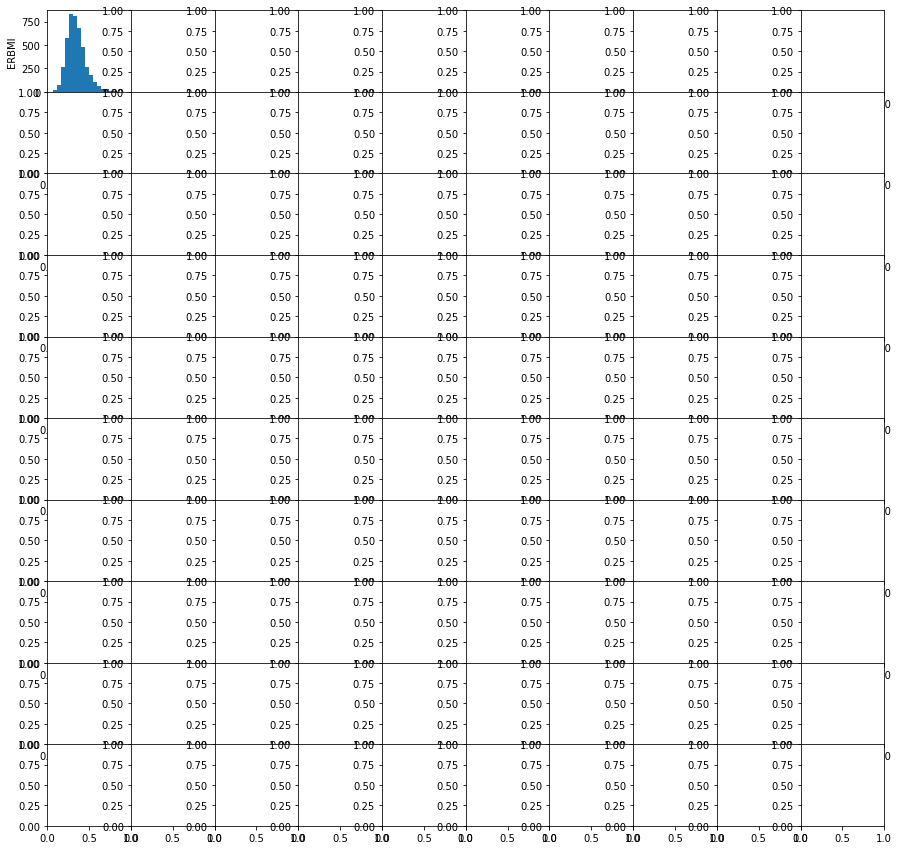

In [1686]:
grr = pd.plotting.scatter_matrix(merged_male_drop[cols_target + cols_ratio]
                                 ,c = dataSet_target
                                 ,figsize=(15, 15)
                                 ,marker = 'o'
                                 ,hist_kwds={'bins' : 20}
                                 ,s = 60
                                 ,alpha = 0.8)
plt.show()

In [ ]:
#y_pred = reg.predict(X)
#residual = y - y_pred
#plt.scatter(y_pred,residual)

In [ ]:
#list(df_meanF['EUHGT'][::])

#df_meanM[]df_meanM[]'EUHGT']<0

## Ansatz